<a href="https://colab.research.google.com/github/K4ztark/Problema-AnalisisNumerico/blob/main/Machine_Learning_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mòdulo 1: Fundamentos del aprendizaje automático, introducción a Scikit learn

In [ ]:
 %matplotlib notebook
 #Vamos a realizar un simple ejemplo de clasificación
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 from sklearn.model_selection import train_test_split

 frutas=pd.read_table("/fruit_data_with_colors.txt")
 frutas.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
#Vamos a crear los datos de entrenamiento y los datos de testeo, vamos a partir la tabla en dos partes, una parte los datos de entrenamiento
#Y otra parte los datos con los que va a testear el clasificador

X=frutas[["mass","width","height","color_score"]]
y=frutas["fruit_label"]
X_train, X_test,y_train,y_test=train_test_split(X,y,random_state=0) #Aquí usamos 75% datos de entrenamiento y 25% datos de prueba, el random state se establece para que cada vez que se ejecute la division sea la misma

In [ ]:
print(X_train.shape)
print(X_test.shape)

(44, 4)
(15, 4)


In [ ]:
print(y_train.shape)
print(y_test.shape)  #Veamos que son 59 filas, 44 son de prueba y 15 de testeo

(44,)
(15,)


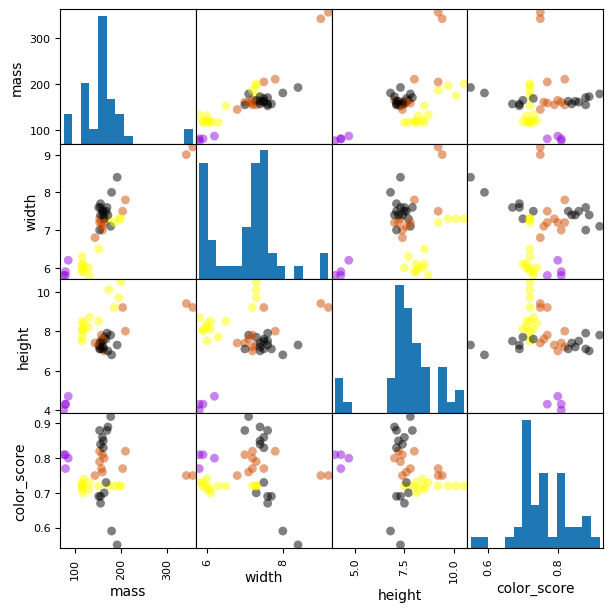

In [ ]:
%matplotlib inline

#Antes de empezar a pasarle los datos a un modelo, es mejor visualizar los datos
from matplotlib import colormaps
cmap = colormaps['gnuplot']

# Gráfico scatter_matrix
scatter = pd.plotting.scatter_matrix(
    X_train,
    c=y_train,
    marker='o',
    s=40,
    hist_kwds={'bins': 15},
    figsize=(7, 7),
    cmap=cmap
)
plt.show()


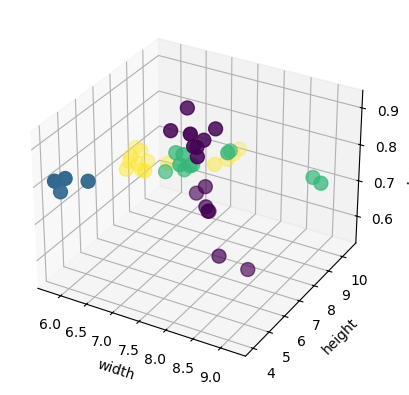

In [ ]:
#Ahora hagamos un grafico 3d
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

#Podemos observar que los distintos tipos de frutas estan boen separados por grupos

In [ ]:
#Para el modelo usaremos el clasificador K vecinos mas cercanos (K-NN)
X=frutas[["mass","width","height"]] #Ahora vamos a usar solo estas 3 caracteristicas
y=frutas["fruit_label"]
X_train, X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [ ]:
#Vamos a crear el clasificador con scikit learn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)  #El método fit toma los datos de entrenamiento y luego cambia el estado del clasificador para permitir la prediccion una vez finalizado el entrenamiento


KNeighborsClassifier()

In [ ]:
#Ahora vamos a estimar la presición del clasificador con los datos de prueba
knn.score(X_test,y_test) #Veamos que el clasificador tuvo un 53.3% de precisión

0.5333333333333333

In [ ]:
#Ahora usaremos el clasificador para predecir objetos nuevos
nombre_fruta = dict(zip(frutas.fruit_label.unique(), frutas.fruit_name.unique()))
prediccion_fruta=knn.predict([[20,4.3,5.5]])
print(nombre_fruta[prediccion_fruta[0]])

mandarin


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
prediccion_fruta=knn.predict([[100,6.3,8.5]])
print(nombre_fruta[prediccion_fruta[0]])

lemon


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


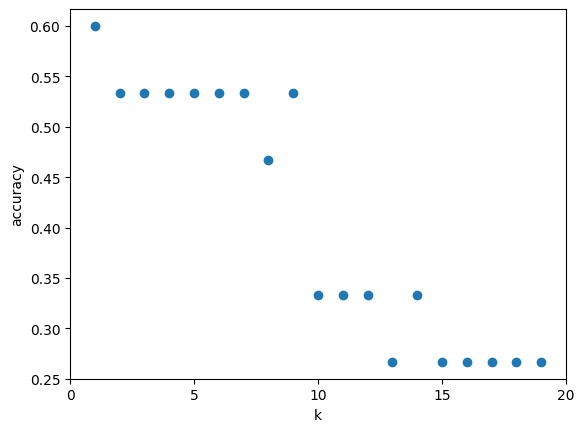

In [ ]:
#Veamos la proecisión del clasificador en relación a k, es decir, cuando k es 1 o 2 o 3,etc.
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);   #Notemos que en este caso entre k sea más grande menos presición, pero cuando es menor hay que tener en cuenta que el clasificador
                              #Esta sujeto a más ruido y datos atípicos.


##Tarea módulo 1


###Punto 1

In [ ]:
#NOTA IMPORTANTE LEER: Esta tarea, consiste en que dan unos datos tipo diccionario donde hay informacion sobre cancer, la idea es hacer un modelo predictivo que dada las caracteristicas del cancer diga si es maligno
#o beningo, en el primer punto se convierte los datos en dataframe, en el segundo se hace una serie con la columna target la cual indica que 0 es un cancer maligno y 1 es un cancer benigno,
#en el tercer punto se divide el dataframe en dos, X son las caracteristicas y Y es la columna target, ya que la idea es que de las caracteristicas, podamos predecir si es beingno o maligno
#en el punto 4 se dividen los datos en datos de entrenamiento y datos de prueba, en el 5to punto se realiza el modelo, en el 6 se hacen predicciones con el promedio de cada una de las características
#en el 7mo punto se hacen las predicciones con los datos de prueba, en el octavo punto se encuentra la presición del modelo y en el punto 9 se realiza un grafico comparando las predicciones de
#los datos de prueba y los de entrenamiento

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

'''print(cancer.keys())
print(cancer.feature_names)'''
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
#Falta agregar la columna target la cual dice si el cancer es malo o benigno
df['target']=cancer.target
#print(df.shape)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


###Punto 2

In [ ]:
ind=["malignant","benign"]
serie_target=pd.Series(df['target'].value_counts())
serie_organizada=serie_target.sort_index(ascending=True)
serie_organizada.index=ind
serie_organizada.name="target"
serie_organizada

,target
malignant,212
benign,357


###Punto 3

In [ ]:
X=df.drop(columns='target')
y=df['target']
#print(X,y)
print(X.shape)
print(y.shape)

(569, 30)
(569,)


###Punto 4

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(columns='target')
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
#print(X_train,X_test,y_train,y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


###Punto 5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelo=KNeighborsClassifier(n_neighbors=1)
modelo.fit(X_train,y_train)
modelo

KNeighborsClassifier(n_neighbors=1)

###Punto 6

In [ ]:
lista=df.mean()[:-1].values.reshape(1, -1)
predicción=modelo.predict(lista)
print(predicción)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


###Punto 7

In [ ]:
prediccion2=modelo.predict(X_test)
prediccion2

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

###Punto 8

In [ ]:
modelo.score(X_test,y_test)

0.916083916083916

###Punto 9

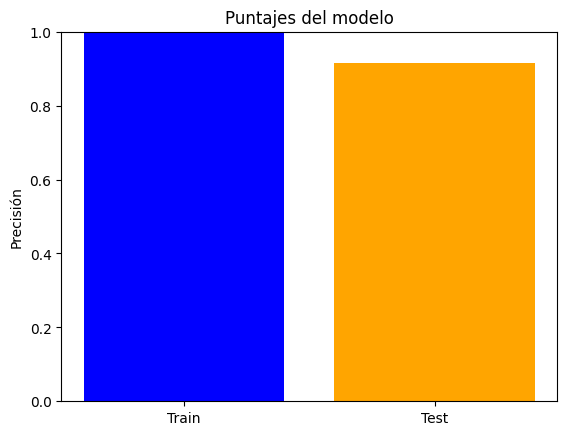

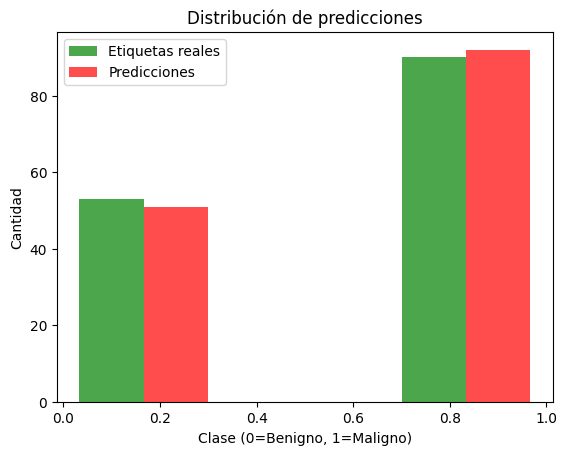

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
train_score = modelo.score(X_train, y_train)
test_score = modelo.score(X_test, y_test)


plt.bar(['Train', 'Test'], [train_score, test_score], color=['blue', 'orange'])
plt.title('Puntajes del modelo')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.show()


y_test_pred = modelo.predict(X_test)


plt.hist([y_test, y_test_pred], label=['Etiquetas reales', 'Predicciones'], bins=3, color=['green', 'red'], alpha=0.7)
plt.title('Distribución de predicciones')
plt.xlabel('Clase (0=Benigno, 1=Maligno)')
plt.ylabel('Cantidad')
plt.legend()
plt.show()
 #Notemos que segun la grafica el modelo tuvo una presición de mas del 90% y que en los datos de testeo, predijo un poco menos de la cantidad de canceres benignos y un poco más
 #de la cantidad de los canceres malignos.